Histogram

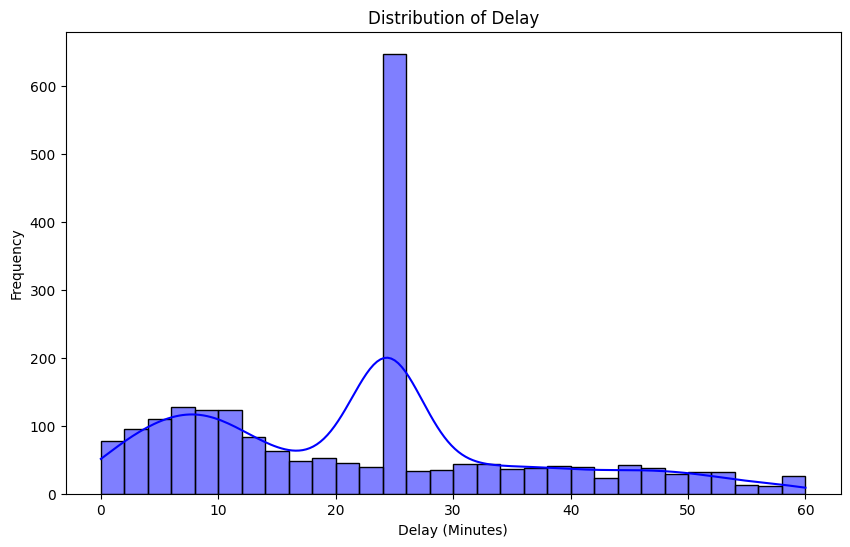

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลด Dataset
file_path = "E:/JOB/Task2_Clean/cleaned_dataset.csv"  # ใส่ path ของไฟล์
data = pd.read_csv(file_path)

# ตรวจสอบคอลัมน์ Delay ว่ามีใน DataFrame หรือไม่
if 'Delay' in data.columns:
    # ลบค่า NaN และแปลงเป็นตัวเลขหากจำเป็น
    data['Delay'] = pd.to_numeric(data['Delay'], errors='coerce')
    data = data.dropna(subset=['Delay'])
    
    # วาดกราฟ Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Delay'], bins=30, kde=True, color="blue")
    plt.title("Distribution of Delay")
    plt.xlabel("Delay (Minutes)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Error: Column 'Delay' not found in the dataset.")


Random forest


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00       392

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660


--- Confusion Matrix ---
[[181   0   0]
 [  0  87   0]
 [  0   0 392]]


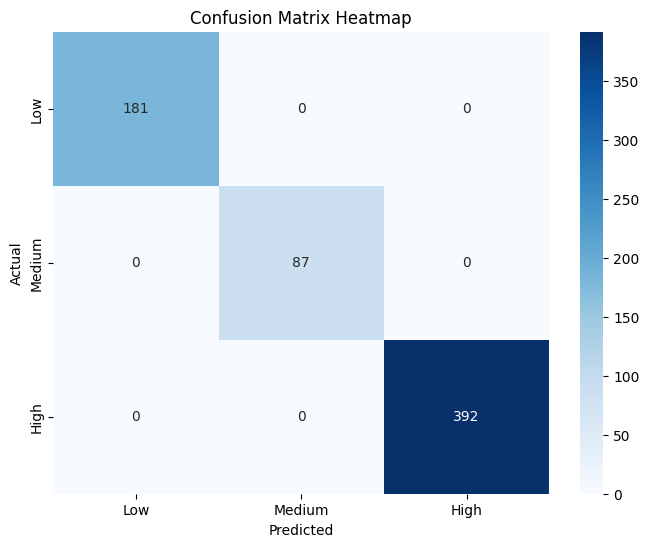

C:\Users\oak_1\AppData\Local\Temp\ipykernel_7428\600562267.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis', hue=None)


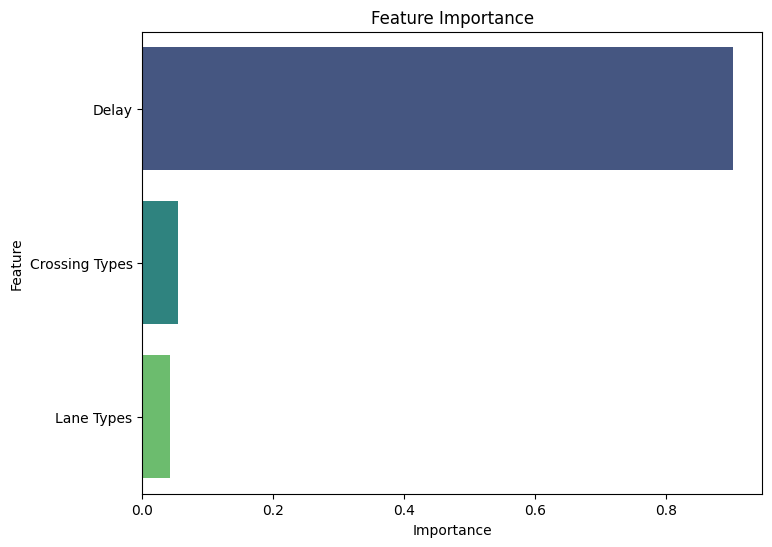

In [10]:
# --- STEP 1: Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# --- STEP 2: Load Dataset ---
# Assuming your dataset is in a CSV file
data = pd.read_csv('E:/JOB/Task2_Clean/cleaned_dataset.csv')

# --- STEP 3: Data Preprocessing ---
# Convert 'Crossing Types' and 'Lane Types' to numeric using LabelEncoder
label_encoder = LabelEncoder()
data['Crossing Types'] = label_encoder.fit_transform(data['Crossing Types'])
data['Lane Types'] = label_encoder.fit_transform(data['Lane Types'])

# Categorize 'Delay' into classes (Low, Medium, High)
bins = [0, 10, 20, float('inf')]  # กำหนดช่วงค่า
labels = ['Low', 'Medium', 'High']  # ใช้ชื่อ label ที่ชัดเจน
data['Delay_Category'] = pd.cut(data['Delay'], bins=bins, labels=labels, include_lowest=True)

# Drop rows with missing values in the required columns
data = data.dropna(subset=['Crossing Types', 'Lane Types', 'Delay_Category'])

# Features (X) and Target (y)
X = data[['Crossing Types', 'Lane Types', 'Delay']]  # รวม 3 ปัจจัย
y = data['Delay_Category'].astype('category').cat.codes  # แปลง Delay Category เป็นตัวเลข (0, 1, 2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- STEP 4: Train Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- STEP 5: Evaluate the Model ---
y_pred = rf_model.predict(X_test)

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(conf_matrix)

# --- STEP 6: Visualize Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- STEP 7: Feature Importance ---
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot Feature Importance without FutureWarning
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis', hue=None)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()





Boxplot:
จะช่วยแสดงความแตกต่างของ Delay ในแต่ละประเภท (Crossing Types, Lane Types).

Accuracy และรายงาน:
จะช่วยประเมินประสิทธิภาพของโมเดลในงานจำแนกประเภท.

Confusion Matrix Heatmap:
ใช้ตรวจสอบว่าการทำนายของโมเดลถูกต้องหรือไม่ในแต่ละกลุ่ม.

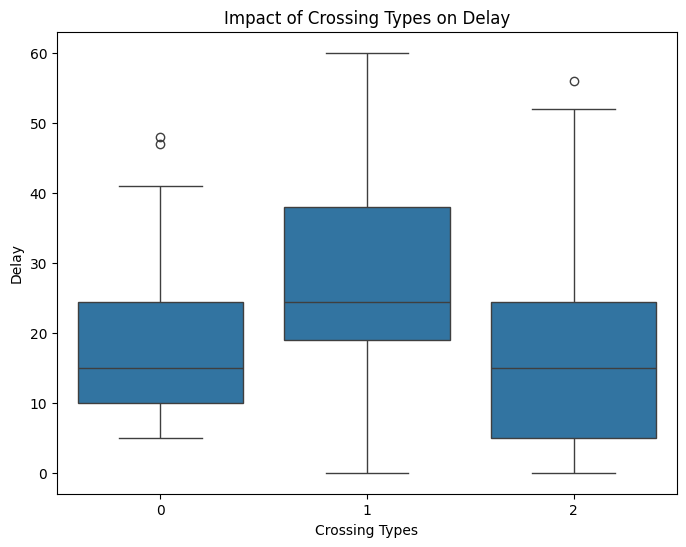

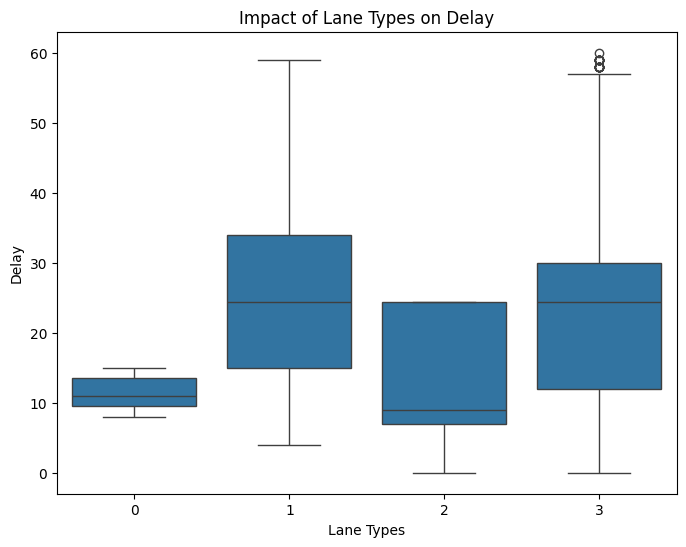

Model Accuracy: 0.65

--- Classification Report ---
              precision    recall  f1-score   support

         Low       0.59      0.37      0.46       181
      Medium       0.36      0.48      0.41        87
        High       0.74      0.81      0.78       392

    accuracy                           0.65       660
   macro avg       0.57      0.56      0.55       660
weighted avg       0.65      0.65      0.64       660


--- Confusion Matrix ---
[[ 67  36  78]
 [ 11  42  34]
 [ 35  38 319]]


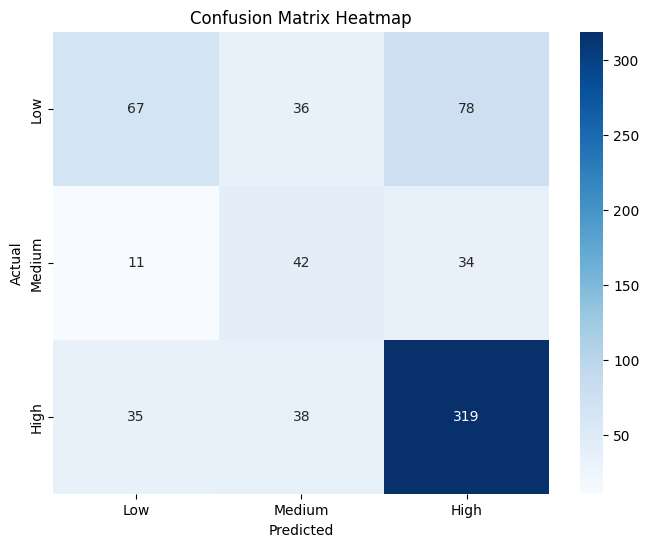

In [4]:
# --- STEP 1: Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 2: Load Dataset ---
file_path = 'E:/JOB/Task2_Clean/cleaned_dataset.csv'  # แก้ไข path ให้ตรงกับตำแหน่งไฟล์จริง
data = pd.read_csv(file_path)

# --- STEP 3: Preprocessing ---
required_columns = ['Crossing Types', 'Lane Types', 'Delay']
if not all(col in data.columns for col in required_columns):
    raise ValueError("The dataset does not contain all required columns.")

data = data.dropna(subset=required_columns)

# แปลง 'Crossing Types' และ 'Lane Types' เป็นตัวเลข
label_encoder = LabelEncoder()
data['Crossing Types'] = label_encoder.fit_transform(data['Crossing Types'])
data['Lane Types'] = label_encoder.fit_transform(data['Lane Types'])

# แบ่ง 'Delay' เป็นกลุ่ม (Low, Medium, High)
bins = [0, 10, 20, float('inf')]  # ระบุช่วง
labels = ['Low', 'Medium', 'High']
data['Delay_Category'] = pd.cut(data['Delay'], bins=bins, labels=labels, include_lowest=True)

# --- STEP 4: Visualization ---
# Boxplot ของ 'Crossing Types' และ 'Delay'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Crossing Types', y='Delay', data=data)
plt.title('Impact of Crossing Types on Delay')
plt.show()

# Boxplot ของ 'Lane Types' และ 'Delay'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Lane Types', y='Delay', data=data)
plt.title('Impact of Lane Types on Delay')
plt.show()

# --- STEP 5: Train and Evaluate Classification Model ---
# Features และ Target
X = data[['Crossing Types', 'Lane Types']]
y = data['Delay_Category']

# แปลง 'Delay_Category' เป็นตัวเลขสำหรับโมเดล
y = y.cat.codes  # แปลง Label เป็นตัวเลข

# แบ่งข้อมูลออกเป็น train และ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างโมเดล Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ทำนายผล
y_pred = rf_model.predict(X_test)

# --- STEP 6: Evaluate the Model ---
# คำนวณค่า Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# สร้าง Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=labels))

# สร้าง Confusion Matrix
print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# วาด Heatmap ของ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
